In [2]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# dataset from other notebook
df = pd.read_csv('NJ12_18_abr.csv')

In [4]:
df.head()

,OCC_CODE,OCC_TITLE_17,OCC_GROUP_17,TOT_EMP_17,EMP_PRSE_17,JOBS_1000_17,LOC_Q_17,H_MEAN_17,A_MEAN_17,MEAN_PRSE_17,...,HOURLY_17,TOT_EMP_12,JOBS_1000_12,LOC_Q_12,H_MEAN_12,A_MEAN_12,MEAN_PRSE_12,H_MEDIAN_12,JOB_CHANGE,WAGE_CHANGE
0,00-0000,All Occupations,total,4050170.0,0.4,1000.000,1.00,27.98,58210.0,0.5,...,NaN,3793720.0,1000.000,1.00,25.00,51990.0,0.6,19.17,6.759856,2.325634
1,11-0000,Management Occupations,major,208980.0,1.0,51.598,0.98,72.61,151040.0,0.7,...,NaN,196140.0,51.701,1.05,63.66,132420.0,0.5,57.21,6.546344,4.083793
2,11-1011,Chief Executives,detailed,660.0,6.9,0.162,0.12,112.04,233050.0,5.4,...,NaN,1230.0,0.325,0.17,92.38,192160.0,2.9,NaN,-46.341463,NaN
3,11-1021,General and Operations Managers,detailed,43070.0,2.0,10.635,0.67,80.58,167600.0,1.1,...,NaN,42960.0,11.325,0.78,77.48,161160.0,0.7,69.15,0.256052,-8.835484
4,11-1031,Legislators,detailed,2610.0,3.6,0.644,1.85,NaN,NaN,NaN,...,NaN,2230.0,0.587,1.35,NaN,37730.0,1.5,NaN,17.040359,NaN


In [5]:
#filter to just the same detail level
df_det = df[df.OCC_GROUP_17 == 'detailed']

/Users/epetenko/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


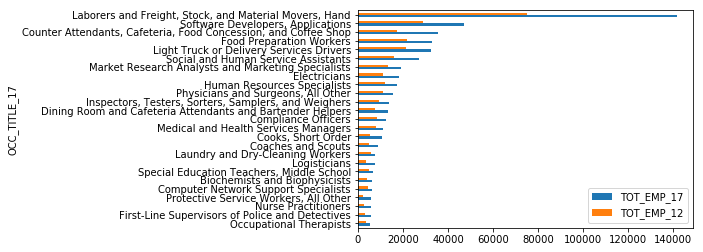

In [6]:
# Filter to jobs with a minimum employment level, then sort by the change in those jobs
df_det[df.TOT_EMP_17 > 5000].set_index('OCC_TITLE_17').sort_values(by='JOB_CHANGE', 
                                                                   ascending=False).head(25)[['TOT_EMP_17',
                                                                                              'TOT_EMP_12']].sort_values(by='TOT_EMP_17').plot(kind='barh')

In [7]:
#getting the job descriptions in case you don't know what the job is
defs = pd.read_excel('soc_2010_definitions.xls', skiprows=6)

In [8]:
defs.head()

,SOC Code,SOC Title,SOC Definition
0,11-1011,Chief Executives,Determine and formulate policies and provide o...
1,11-1021,General and Operations Managers,"Plan, direct, or coordinate the operations of ..."
2,11-1031,Legislators,"Develop, introduce or enact laws and statutes ..."
3,11-2011,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici..."
4,11-2021,Marketing Managers,"Plan, direct, or coordinate marketing policies..."


In [9]:
#merge
df_wdesc = df_det.merge(defs[['SOC Code', 'SOC Definition']], left_on='OCC_CODE', right_on='SOC Code', how='left')

In [20]:
#create hottest jobs dataset
df_wdesc[df_wdesc.TOT_EMP_17 > 5000].sort_values(by='JOB_CHANGE', ascending=False).head(25)

,OCC_CODE,OCC_TITLE_17,OCC_GROUP_17,TOT_EMP_17,EMP_PRSE_17,JOBS_1000_17,LOC_Q_17,H_MEAN_17,A_MEAN_17,MEAN_PRSE_17,...,JOBS_1000_12,LOC_Q_12,H_MEAN_12,A_MEAN_12,MEAN_PRSE_12,H_MEDIAN_12,JOB_CHANGE,WAGE_CHANGE,SOC Code,SOC Definition
535,47-2231,Solar Photovoltaic Installers,detailed,760.0,23.5,0.187,3.02,26.51,55140.0,9.0,...,0.019,0.52,22.16,46100.0,7.1,22.73,985.714286,-12.919804,47-2231,"Assemble, install, or maintain solar photovolt..."
258,27-3021,Broadcast News Analysts,detailed,340.0,33.6,0.084,2.06,21.47,44660.0,14.1,...,0.016,0.40,40.44,84110.0,5.6,40.29,466.666667,-65.928268,27-3021,"Analyze, interpret, and broadcast news receive..."
143,19-4041,Geological and Petroleum Technicians,detailed,310.0,8.0,0.076,0.73,NaN,NaN,NaN,...,0.016,0.14,24.43,50820.0,6.5,22.96,416.666667,NaN,19-4041,Assist scientists or engineers in the use of e...
591,49-9069,"Precision Instrument and Equipment Repairers, ...",detailed,850.0,25.7,0.211,2.79,32.01,66580.0,3.9,...,0.046,0.51,25.24,52500.0,3.1,25.88,400.000000,17.590201,49-9069,All precision instrument and equipment repaire...
596,49-9096,Riggers,detailed,140.0,30.7,0.035,0.24,28.57,59420.0,7.6,...,0.009,0.08,27.53,57270.0,3.9,27.63,366.666667,-1.933806,49-9096,Set up or repair rigging for construction proj...
554,49-2021,"Radio, Cellular, and Tower Equipment Installer...",detailed,490.0,24.4,0.122,1.27,31.88,66310.0,5.2,...,0.032,0.26,24.99,51980.0,5.4,22.86,308.333333,22.158588,49-2021,"Repair, install or maintain mobile or stationa..."
56,13-2061,Financial Examiners,detailed,2310.0,13.7,0.570,1.41,52.45,109100.0,3.8,...,0.156,0.72,45.85,95380.0,4.6,41.85,291.525424,4.707782,13-2061,Enforce or ensure compliance with laws and reg...
199,25-1113,"Social Work Teachers, Postsecondary",detailed,560.0,2.9,0.139,1.59,NaN,80810.0,2.4,...,0.041,0.54,NaN,73120.0,5.3,NaN,273.333333,1.303541,25-1113,Teach courses in social work. Includes both t...
178,25-1032,"Engineering Teachers, Postsecondary",detailed,1270.0,20.1,0.314,1.21,NaN,NaN,NaN,...,0.098,0.37,NaN,97060.0,3.6,NaN,243.243243,NaN,25-1032,Teach courses pertaining to the application of...
606,51-2091,Fiberglass Laminators and Fabricators,detailed,670.0,9.2,0.166,1.13,20.95,43580.0,5.1,...,0.054,0.40,13.39,27850.0,4.3,12.99,219.047619,48.980440,51-2091,Laminate layers of fiberglass on molds to form...


In [11]:
# df_wdesc[df_wdesc.TOT_EMP_17 > 5000].sort_values(by='JOB_CHANGE', ascending=False).head(50).to_csv('Fastest_growing_jobs_18.csv',
#                                                                                                   encoding='utf-8')

In [12]:
df_major = df[df.OCC_GROUP_17 == 'major']
df_major.OCC_TITLE_17 = df_major.OCC_TITLE_17.replace(to_replace='Occupations', value='', regex=True)

/Users/epetenko/miniconda2/lib/python2.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


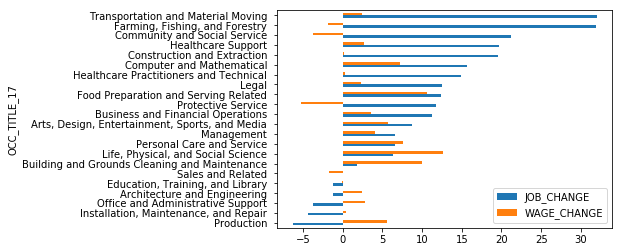

In [13]:
df_major.set_index('OCC_TITLE_17').sort_values(by='JOB_CHANGE')[['JOB_CHANGE',
                                                                'WAGE_CHANGE']].plot(kind='barh')

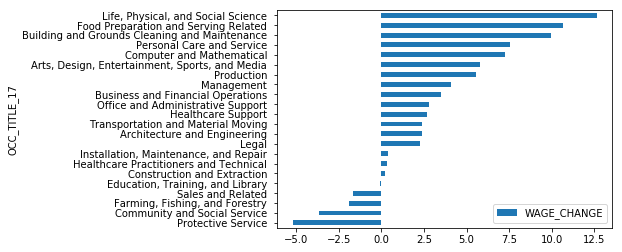

In [14]:
df_major.set_index('OCC_TITLE_17').sort_values(by='WAGE_CHANGE')[['WAGE_CHANGE']].plot(kind='barh')

In [19]:
df_major.set_index('OCC_TITLE_17').sort_values(by='TOT_EMP_17')[['JOB_CHANGE', 'WAGE_CHANGE', 'TOT_EMP_17']]

,JOB_CHANGE,WAGE_CHANGE,TOT_EMP_17
OCC_TITLE_17,,,
"Farming, Fishing, and Forestry",31.899642,-1.906739,3680.0
Legal,12.462512,2.260666,33750.0
"Life, Physical, and Social Science",6.353749,12.644136,37160.0
"Arts, Design, Entertainment, Sports, and Media",8.740068,5.763758,47900.0
Architecture and Engineering,-1.219748,2.369453,51020.0
Community and Social Service,21.230608,-3.692023,69550.0
Protective Service,11.722877,-5.213985,109980.0
Construction and Extraction,19.540570,0.184649,121250.0
Personal Care and Service,6.542465,7.568942,121810.0


In [16]:
# df_major.set_index('OCC_TITLE_17').sort_values(by='JOB_CHANGE')[['JOB_CHANGE', 'WAGE_CHANGE', 'TOT_EMP_17']].to_csv('Major_occupations_change.csv')